In [2]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import glob
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score

In [3]:
#Creating the Training dataframe
path = r'/home/harindu/Assignment_II/accel_data_1' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

activityDF = pd.concat(li, axis=0, ignore_index=True)

In [4]:
#Creating the Testing dataframe
path = r'/home/harindu/Assignment_II/accel_data_test' 
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=None, header=None)
    li.append(df)

activityDF_Test = pd.concat(li, axis=0, ignore_index=True)

In [5]:
activityDF_Test.columns = ['index', 'xAccel', 'yAccel', 'zAccel', 'activity']
activityDF_Test = activityDF_Test.drop(['index'], axis=1)

In [6]:
activityDF_Test = activityDF_Test.drop(activityDF_Test[activityDF_Test.activity == 0].index)

In [7]:
activityDF.columns = ['index', 'xAccel', 'yAccel', 'zAccel', 'activity']

In [8]:
activityDF

,index,xAccel,yAccel,zAccel,activity
0,0.0,1502,2215,2153,1
1,1.0,1667,2072,2047,1
2,2.0,1611,1957,1906,1
3,3.0,1601,1939,1831,1
4,4.0,1643,1965,1879,1
...,...,...,...,...,...
1431437,140900.0,2098,2305,1982,7
1431438,140900.0,2106,2314,1980,7
1431439,140900.0,2112,2319,1973,7
1431440,140900.0,2111,2319,1969,7


In [9]:
activityDF = activityDF.drop(['index'], axis=1)

In [10]:
activityDF.shape

(1431442, 4)

In [11]:
#Comparing the data types
activityDF.dtypes

xAccel      int64
yAccel      int64
zAccel      int64
activity    int64
dtype: object

In [12]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
0      3446
Name: activity, dtype: int64

In [13]:
activityDF = activityDF.drop(activityDF[activityDF.activity == 0].index)

In [14]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
Name: activity, dtype: int64

In [15]:
activityDF.shape

(1427996, 4)

In [16]:
activityDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1427996 entries, 0 to 1431440
Data columns (total 4 columns):
 #   Column    Non-Null Count    Dtype
---  ------    --------------    -----
 0   xAccel    1427996 non-null  int64
 1   yAccel    1427996 non-null  int64
 2   zAccel    1427996 non-null  int64
 3   activity  1427996 non-null  int64
dtypes: int64(4)
memory usage: 54.5 MB


In [17]:
pd.options.display.float_format = '{:,.10f}'.format
activityDF.describe()

,xAccel,yAccel,zAccel,activity
count,"1,427,996.0000000000","1,427,996.0000000000","1,427,996.0000000000","1,427,996.0000000000"
mean,"1,959.8665878616","2,379.6311999473","1,989.5479637198",3.8432677683
std,108.4654587558,101.5129892019,85.7307301386,2.4498899962
min,282.0000000000,146.0000000000,1.0000000000,1.0000000000
25%,"1,885.0000000000","2,337.0000000000","1,952.0000000000",1.0000000000
50%,"1,951.0000000000","2,363.0000000000","2,001.0000000000",4.0000000000
75%,"2,063.0000000000","2,395.0000000000","2,041.0000000000",7.0000000000
max,"3,828.0000000000","3,997.0000000000","4,095.0000000000",7.0000000000


In [18]:
activityDF.notnull().sum()

xAccel      1427996
yAccel      1427996
zAccel      1427996
activity    1427996
dtype: int64

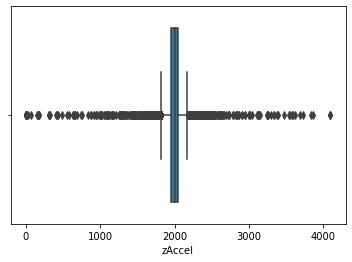

In [19]:
sns.boxplot(x=activityDF['zAccel'])

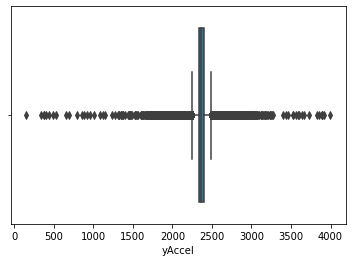

In [20]:
sns.boxplot(x=activityDF['yAccel'])

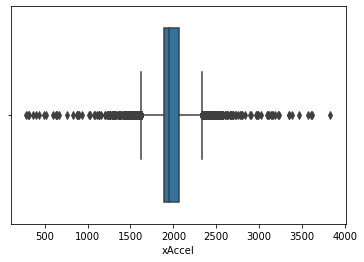

In [21]:
sns.boxplot(x=activityDF['xAccel'])

<Figure size 432x288 with 0 Axes>

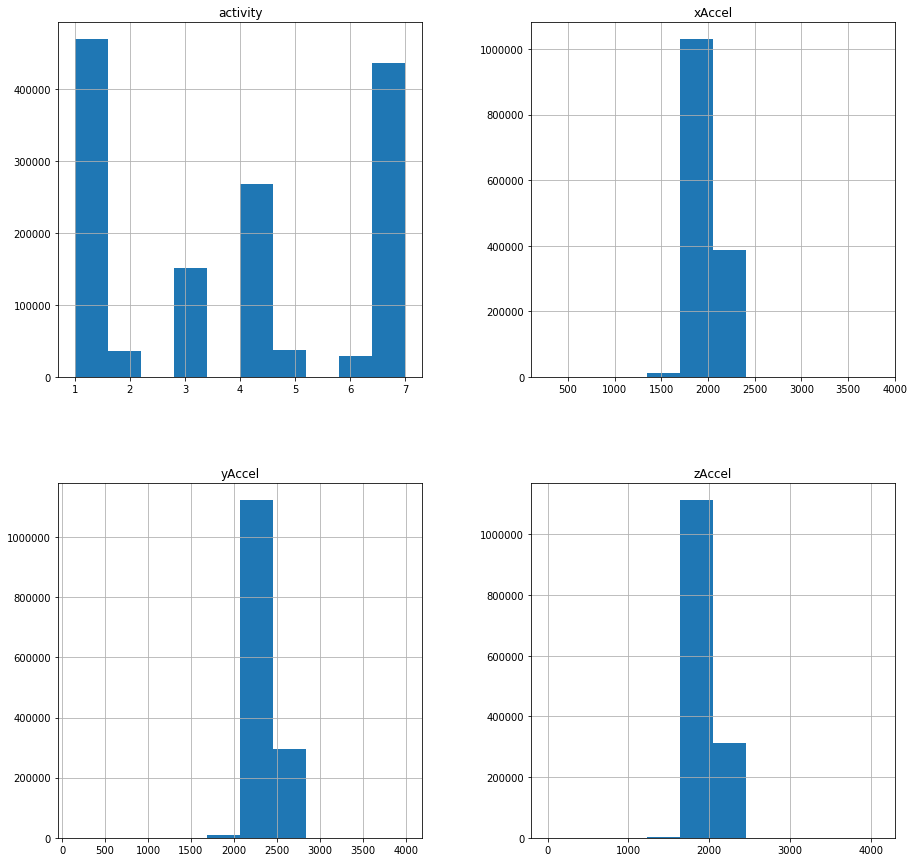

In [22]:
plt.figure()
activityDF.hist(figsize=(15,15))
plt.show()

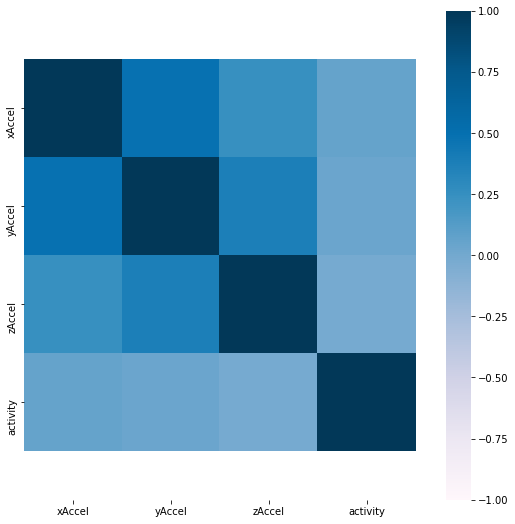

In [23]:
correlations = activityDF.corr()
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlations, cmap="PuBu", center=0, vmin=-1, vmax=1, square=True)
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

In [25]:
activityDF['activity'].value_counts()

1    469437
7    436951
4    268320
3    150927
5     37338
2     35703
6     29320
Name: activity, dtype: int64

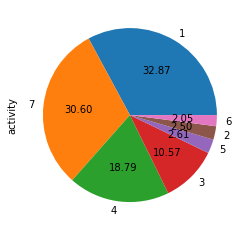

In [26]:
#Gender distribution in the dataset

activityDF['activity'].value_counts().plot(kind='pie',autopct='%.2f')

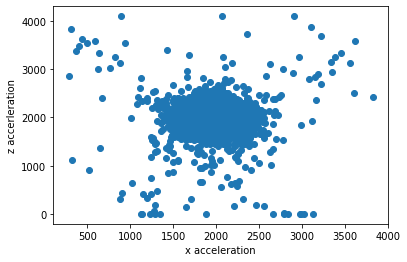

In [27]:
plt.scatter(activityDF['xAccel'],activityDF['zAccel'])
plt.xlabel('x acceleration')
plt.ylabel('z accerleration')
plt.show()

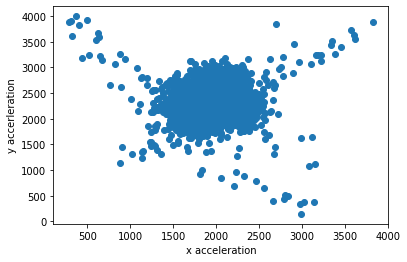

In [28]:
plt.scatter(activityDF['xAccel'],activityDF['yAccel'])
plt.xlabel('x acceleration')
plt.ylabel('y accerleration')
plt.show()

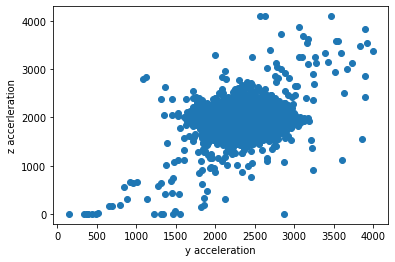

In [29]:
plt.scatter(activityDF['yAccel'],activityDF['zAccel'])
plt.xlabel('y acceleration')
plt.ylabel('z accerleration')
plt.show()

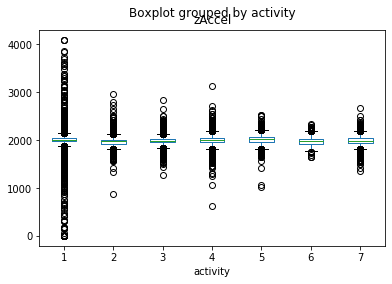

In [30]:
activityDF.boxplot(by ='activity', column =['zAccel'], grid = False) 

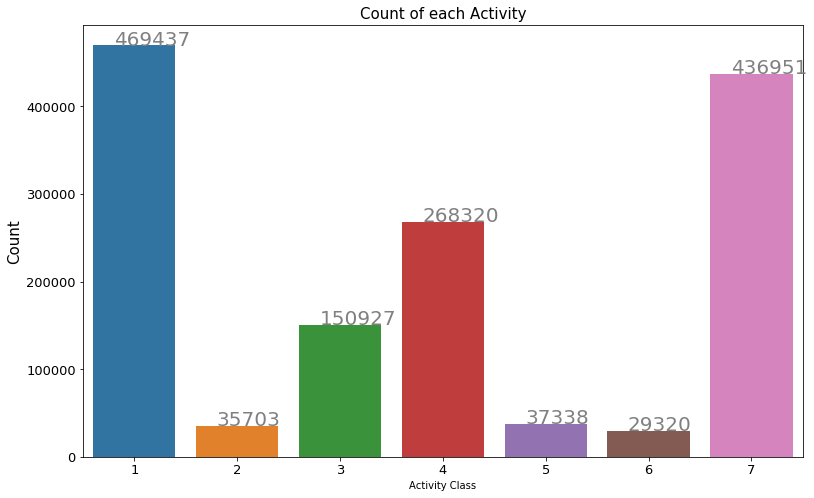

In [31]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0,0,1,1])
ax.set_title("Count of each Activity", fontsize = 15)
plt.tick_params(labelsize = 10)
sns.countplot(x = "activity", data = activityDF)
for i in ax.patches:
    ax.text(x = i.get_x() + 0.2, y = i.get_height()+10, s = str(i.get_height()), fontsize = 20, color = "grey")
plt.xlabel("Activity Class")
plt.ylabel("Count", fontsize = 15)
plt.tick_params(labelsize = 13)
plt.xticks(rotation = 0)
plt.show()